# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

Load feature names.

In [3]:
feature_names = []
with open('../data/raw/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names:', len(feature_names))

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [6]:
X, Y = [], []

with open('../data/raw/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


# 1

Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

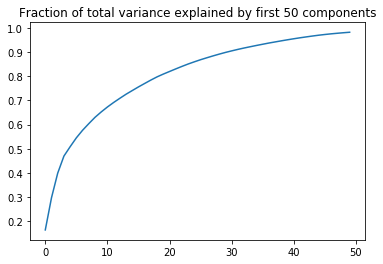

In [108]:
def P1():
    pca = PCA(n_components = 50,  random_state = 0)
    pca.fit(train_data)
    varcumsum = np.cumsum(pca.explained_variance_ratio_)
    plt.plot(varcumsum)
    plt.title("Fraction of total variance explained by first 50 components")
    plt.show()

P1()

# 2

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

(7000, 126)
(7000, 2)


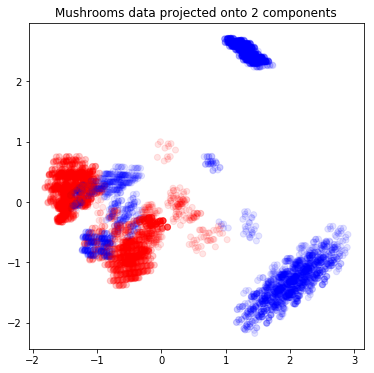

In [191]:
def P2():
    # see
    # https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
    pca = PCA(n_components = 2,  random_state = 0)
    pca.fit(train_data)
    train_data_pca = pca.transform(train_data)
    print(train_data.shape)
    print(train_data_pca.shape)
    
    colors = ["red","blue"]
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(colors)
    
    plt.figure(figsize=(6,6))
    plt.scatter(x = train_data_pca[:,0], y = train_data_pca[:,1], c = train_labels, cmap = cmap, alpha = 0.1)
    plt.title("Mushrooms data projected onto 2 components")
    plt.show()

P2()

# 3

Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

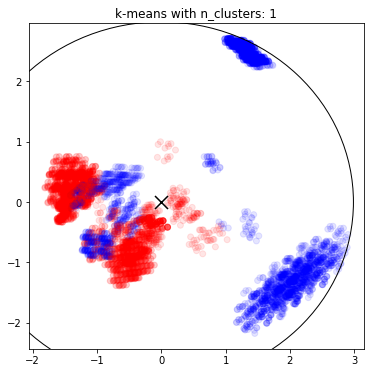

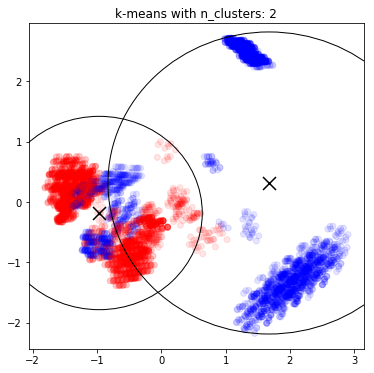

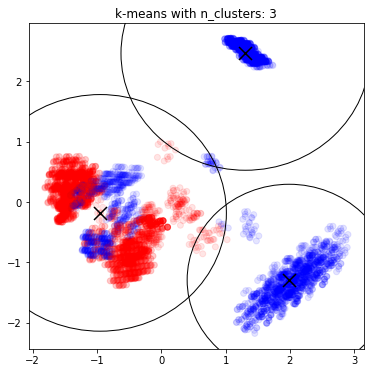

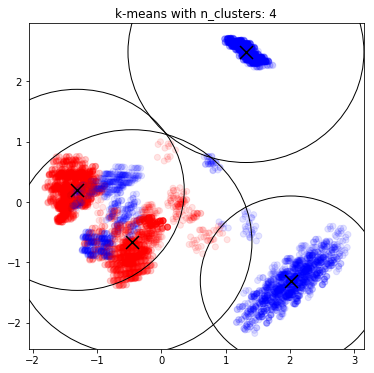

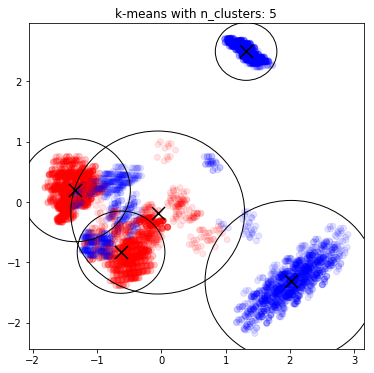

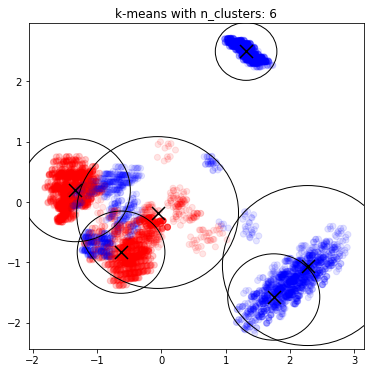

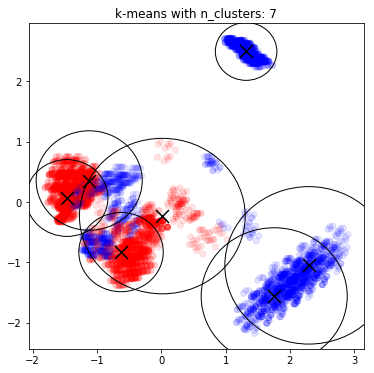

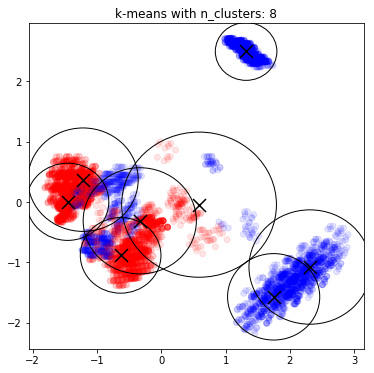

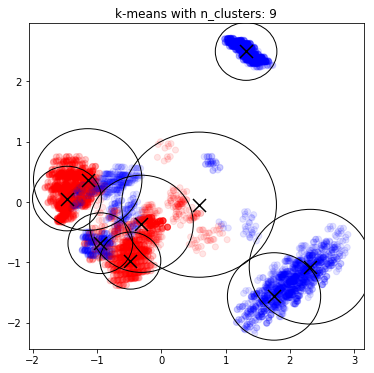

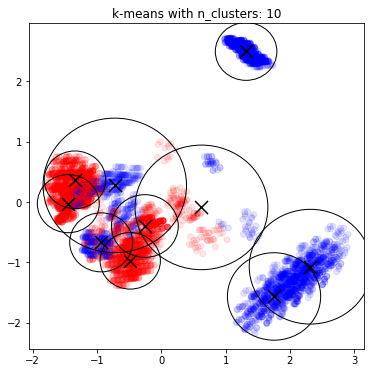

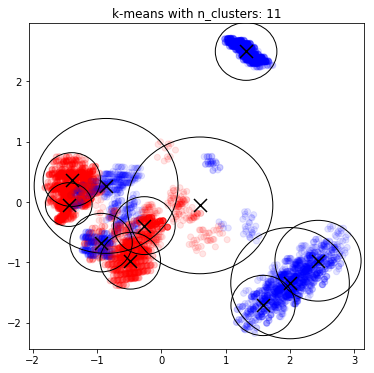

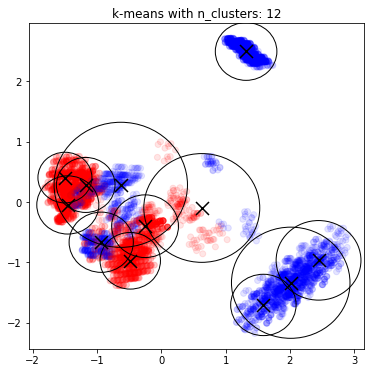

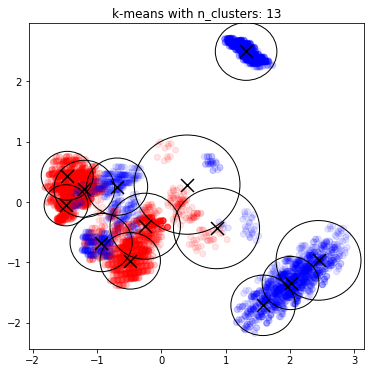

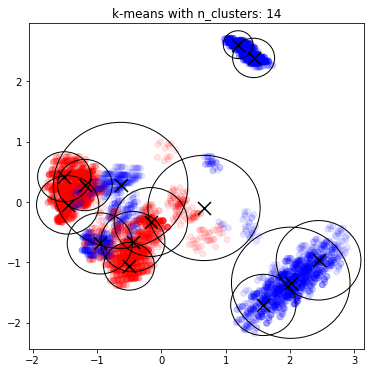

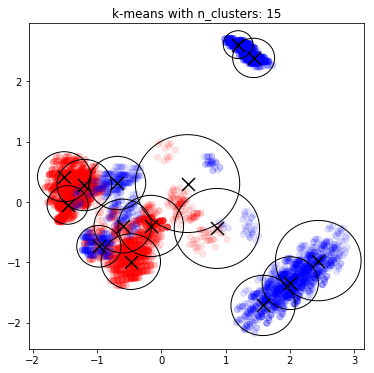

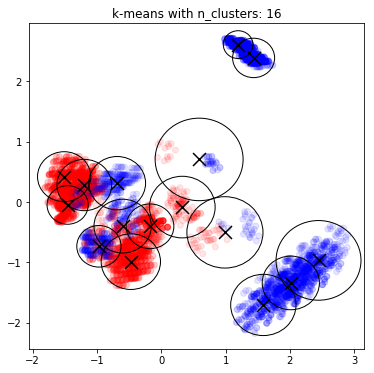

In [190]:
def P3():
    def do_pca(data):
        pca = PCA(n_components = 2)
        pca.fit(data)
        data_pca = pca.transform(train_data)
        return data_pca
    
    def do_km(data, n_clusters):
        
        def calc_radii(data, labels, centroids):
            radii = []
            for lbl in np.unique(labels):
                points = data[labels == lbl]
                centroid = centroids[lbl]
                from scipy.spatial import distance
                dists = list(map(lambda x: distance.euclidean(centroid, x), points))
                max_dist = max(dists)
                radii.append(max_dist)
            return radii
        
        km = KMeans(n_clusters = n_clusters, random_state = 0)
        km.fit(data)
        
        # for each centroid, determines distance to furthest point in cluster
        centroids_radii = calc_radii(data, km.labels_, km.cluster_centers_)
        
        # creates our plot
        fig, ax = plt.subplots(figsize=(6,6))
        
        # for each centroid, draw a circle with radius = furthest point in cluster
        for c, r in zip(km.cluster_centers_, centroids_radii):
            circle = Circle(c, r, fill = False)
            ax.add_artist(circle)
        
        # plots the scatter plot of the data and the centroids
        colors = ["red","blue"]
        from matplotlib.colors import ListedColormap
        cmap = ListedColormap(colors)
        plt.scatter(x = train_data_pca[:,0], y = train_data_pca[:,1], c = train_labels, cmap = cmap, alpha = 0.1)
        plt.scatter(x = km.cluster_centers_[:,0], y = km.cluster_centers_[:,1], color = "black", marker = "x", s = 169, linewidths = 6)
        plt.title("k-means with n_clusters: " + str(n_clusters))
        plt.show()
    
    train_data_pca = do_pca(train_data)
    km_ncs = np.arange(1, 16 + 1)
    for nc in km_ncs:
        print("============================")
        do_km(train_data_pca, nc)

P3()

# 4

Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

n_components 1
------------------
cov_mat_type spherical


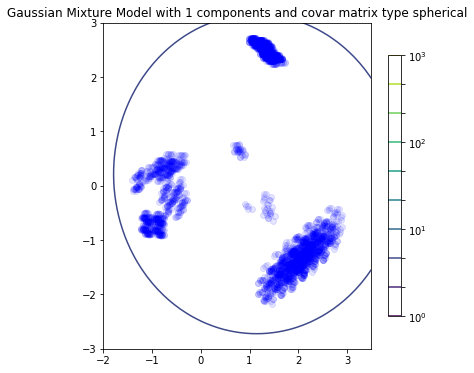

------------------
cov_mat_type diag


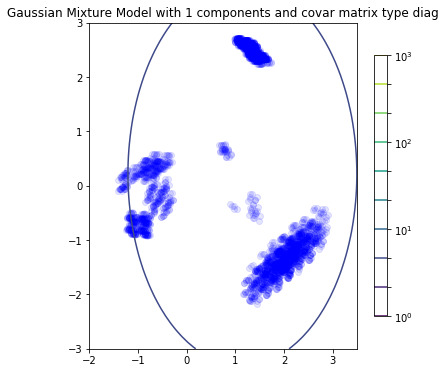

------------------
cov_mat_type tied


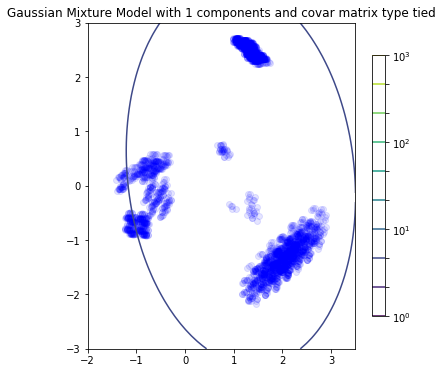

------------------
cov_mat_type full


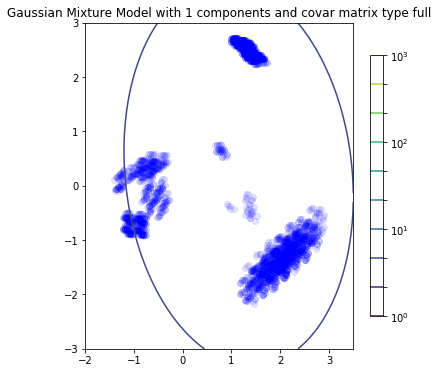

n_components 2
------------------
cov_mat_type spherical


C:\Users\yangyq\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


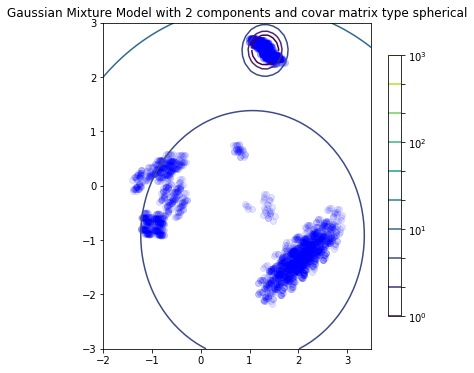

------------------
cov_mat_type diag


C:\Users\yangyq\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


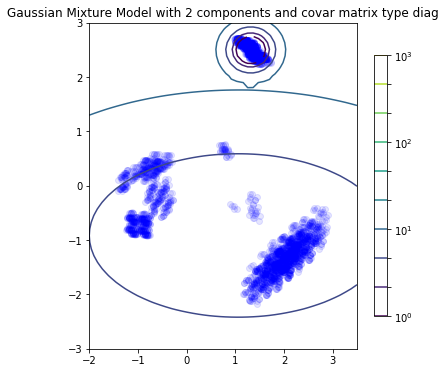

------------------
cov_mat_type tied


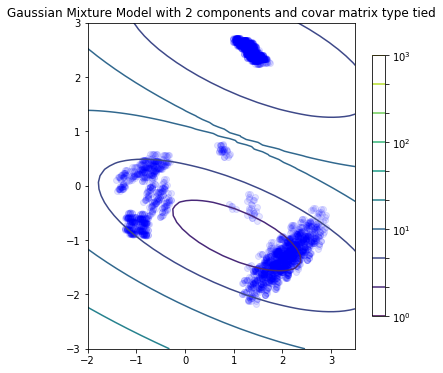

------------------
cov_mat_type full


C:\Users\yangyq\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


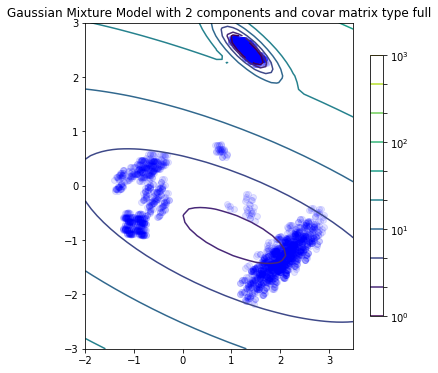

n_components 3
------------------
cov_mat_type spherical


C:\Users\yangyq\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


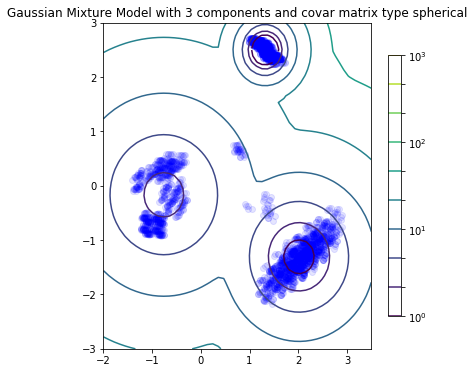

------------------
cov_mat_type diag


C:\Users\yangyq\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


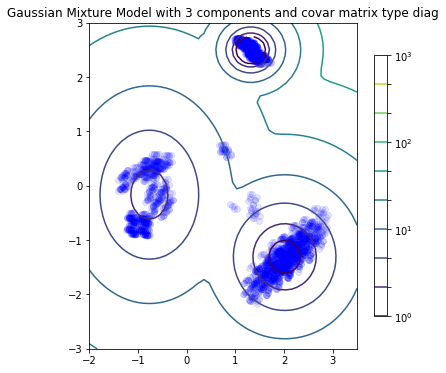

------------------
cov_mat_type tied


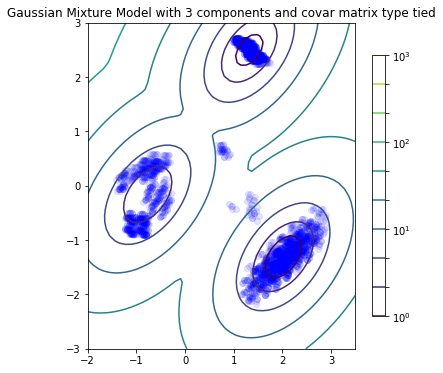

------------------
cov_mat_type full


C:\Users\yangyq\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


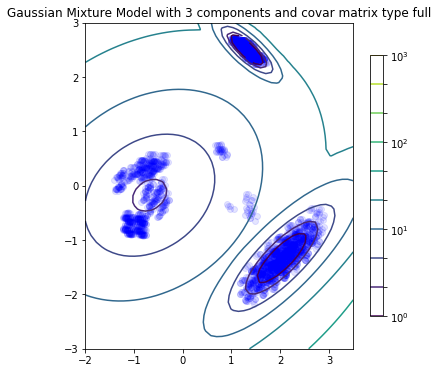

n_components 4
------------------
cov_mat_type spherical


C:\Users\yangyq\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


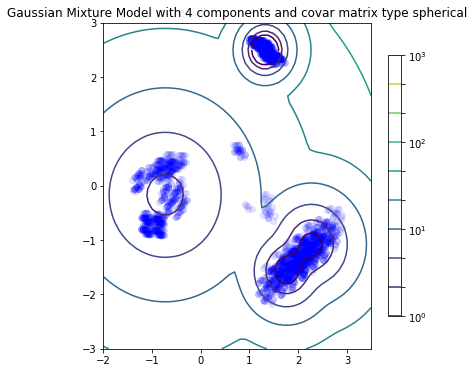

------------------
cov_mat_type diag


C:\Users\yangyq\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


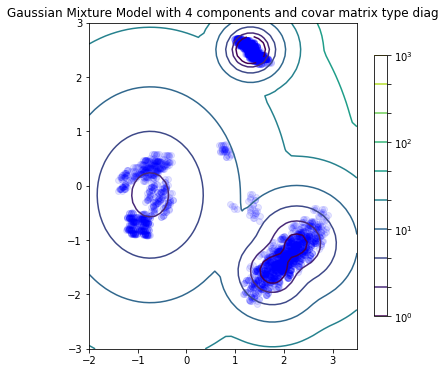

------------------
cov_mat_type tied


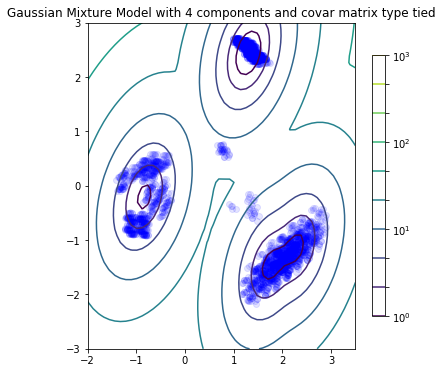

------------------
cov_mat_type full


C:\Users\yangyq\Anaconda3\lib\site-packages\matplotlib\contour.py:1561: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


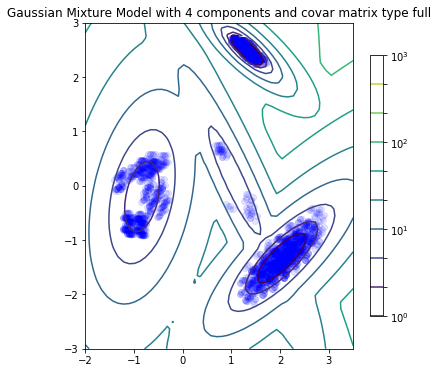

In [225]:
def P4():
    
    def do_pca_badshrooms(data, labels):
        # projects mushroom data onto 2 components
        pca = PCA(n_components = 2, random_state = 0)
        pca.fit(train_data)
        train_data_pca = pca.transform(train_data)
        
        # returns the poisonous mushrooms
        bad_shrooms = train_data_pca[labels == 1]
        return bad_shrooms
        
    
    def do_gmm(data, n_comp, cov_t):
        # fits mushroom data to given number of components and covar matrix type
        clf = GaussianMixture(n_components = n_comp, covariance_type = cov_t, random_state = 0)
        clf.fit(data)
        
        # plot the contour plot
        plt.figure(figsize=(6,6))
        x = np.linspace(-2, 3.5)
        y = np.linspace(-3., 3.)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -clf.score_samples(XX)
        Z = Z.reshape(X.shape)
        CS = plt.contour(X, Y, Z, norm = LogNorm(vmin = 1.0, vmax = 1000.0), levels = np.logspace(0, 3, 10))
        CB = plt.colorbar(CS, shrink=0.8, extend='both')
        plt.scatter(x = data[:, 0], y = data[:, 1], c = "blue", alpha = 0.1)
        plt.title("Gaussian Mixture Model with " + str(n_comp) + " components and covar matrix type " + cov_t)
        plt.show()

    n_components = [1, 2, 3, 4]
    cov_mat_type = ["spherical", "diag", "tied", "full"]
    bad_shrooms = do_pca_badshrooms(train_data, train_labels)
    for n in n_components:
        print("==============")
        print("n_components", n)
        for c in cov_mat_type:
            print("------------------")
            print("cov_mat_type", c)
            do_gmm(bad_shrooms, n, c)
        
P4()

# 5

Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GaussianMixture.score_samples). What is the accuracy?

In [226]:
def P5():
    
    def do_pca_2d(data):
        # projects mushroom data onto 2 components
        pca = PCA(n_components = 2, random_state = 0)
        pca.fit(data)
        data_pca = pca.transform(data)
        return data_pca
    
    def do_gmm(data):
        clf = GaussianMixture(n_components = 4, covariance_type = "full", random_state = 0)
        clf.fit(data)
        return clf
    
    train_data_pca = do_pca_2d(train_data)
    test_data_pca = do_pca_2d(test_data)
    
    badshrooms = train_data_pca[train_labels == 1]
    goodshrooms = train_data_pca[train_labels == 0]
    
    gmm_badshrooms = do_gmm(badshrooms)
    gmm_goodshrooms = do_gmm(goodshrooms)
    
    probably_bad = gmm_badshrooms.score_samples(test_data_pca)
    probably_good = gmm_goodshrooms.score_samples(test_data_pca)
    test_preds = (probably_bad > probably_good) * 1
    
    # determines accuracy of test_preds
    from sklearn.metrics import accuracy_score
    score = accuracy_score(test_labels, test_preds)
    print("accuracy is ", score)

P5()

accuracy is  0.5088967971530249


# 6 

Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

n_params, score 6 0.8042704626334519
n_params, score 6 0.8345195729537367
n_params, score 6 0.6788256227758007
n_params, score 6 0.6788256227758007
n_params, score 12 0.6770462633451957
n_params, score 12 0.6734875444839857
n_params, score 12 0.858540925266904
n_params, score 12 0.8781138790035588
n_params, score 18 0.7215302491103203
n_params, score 18 0.7170818505338078
n_params, score 18 0.6120996441281139
n_params, score 18 0.7117437722419929
n_params, score 24 0.7215302491103203
n_params, score 24 0.655693950177936
n_params, score 24 0.6129893238434164
n_params, score 24 0.5088967971530249
n_params, score 30 0.7170818505338078
n_params, score 30 0.7250889679715302
n_params, score 30 0.604982206405694
n_params, score 30 0.5088967971530249
n_params, score 36 0.7099644128113879
n_params, score 36 0.7001779359430605
n_params, score 36 0.6565836298932385
n_params, score 36 0.4750889679715303
n_params, score 42 0.7055160142348754
n_params, score 42 0.9083629893238434
n_params, score 42 

n_params, score 10 0.8345195729537367
n_params, score 10 0.6788256227758007
n_params, score 10 0.6788256227758007
n_params, score 20 0.6770462633451957
n_params, score 20 0.6734875444839857
n_params, score 20 0.858540925266904
n_params, score 20 0.8781138790035588
n_params, score 30 0.7215302491103203
n_params, score 30 0.7170818505338078
n_params, score 30 0.6120996441281139
n_params, score 30 0.7117437722419929
n_params, score 40 0.7215302491103203
n_params, score 40 0.655693950177936
n_params, score 40 0.6129893238434164
n_params, score 40 0.5088967971530249
n_params, score 50 0
n_params, score 50 0
n_params, score 50 0
n_params, score 50 0
n_params, score 60 0
n_params, score 60 0
n_params, score 60 0
n_params, score 60 0
n_params, score 70 0
n_params, score 70 0
n_params, score 70 0
n_params, score 70 0
n_params, score 80 0
n_params, score 80 0
n_params, score 80 0
n_params, score 80 0
n_params, score 90 0
n_params, score 90 0
n_params, score 90 0
n_params, score 90 0
n_params, sc

n_params, score 14 0.8345195729537367
n_params, score 14 0.6788256227758007
n_params, score 14 0.6788256227758007
n_params, score 28 0.6770462633451957
n_params, score 28 0.6734875444839857
n_params, score 28 0.858540925266904
n_params, score 28 0.8781138790035588
n_params, score 42 0.7215302491103203
n_params, score 42 0.7170818505338078
n_params, score 42 0.6120996441281139
n_params, score 42 0.7117437722419929
n_params, score 56 0
n_params, score 56 0
n_params, score 56 0
n_params, score 56 0
n_params, score 70 0
n_params, score 70 0
n_params, score 70 0
n_params, score 70 0
n_params, score 84 0
n_params, score 84 0
n_params, score 84 0
n_params, score 84 0
n_params, score 98 0
n_params, score 98 0
n_params, score 98 0
n_params, score 98 0
n_params, score 112 0
n_params, score 112 0
n_params, score 112 0
n_params, score 112 0
n_params, score 126 0
n_params, score 126 0
n_params, score 126 0
n_params, score 126 0
n_params, score 140 0
n_params, score 140 0
n_params, score 140 0
n_par

n_params, score 18 0.8345195729537367
n_params, score 18 0.6788256227758007
n_params, score 18 0.6788256227758007
n_params, score 36 0.6770462633451957
n_params, score 36 0.6734875444839857
n_params, score 36 0.858540925266904
n_params, score 36 0.8781138790035588
n_params, score 54 0
n_params, score 54 0
n_params, score 54 0
n_params, score 54 0
n_params, score 72 0
n_params, score 72 0
n_params, score 72 0
n_params, score 72 0
n_params, score 90 0
n_params, score 90 0
n_params, score 90 0
n_params, score 90 0
n_params, score 108 0
n_params, score 108 0
n_params, score 108 0
n_params, score 108 0
n_params, score 126 0
n_params, score 126 0
n_params, score 126 0
n_params, score 126 0
n_params, score 144 0
n_params, score 144 0
n_params, score 144 0
n_params, score 144 0
n_params, score 162 0
n_params, score 162 0
n_params, score 162 0
n_params, score 162 0
n_params, score 180 0
n_params, score 180 0
n_params, score 180 0
n_params, score 180 0
n_params, score 198 0
n_params, score 198 0

n_params, score 22 0.8042704626334519
n_params, score 22 0.8345195729537367
n_params, score 22 0.6788256227758007
n_params, score 22 0.6788256227758007
n_params, score 44 0.6770462633451957
n_params, score 44 0.6734875444839857
n_params, score 44 0.858540925266904
n_params, score 44 0.8781138790035588
n_params, score 66 0
n_params, score 66 0
n_params, score 66 0
n_params, score 66 0
n_params, score 88 0
n_params, score 88 0
n_params, score 88 0
n_params, score 88 0
n_params, score 110 0
n_params, score 110 0
n_params, score 110 0
n_params, score 110 0
n_params, score 132 0
n_params, score 132 0
n_params, score 132 0
n_params, score 132 0
n_params, score 154 0
n_params, score 154 0
n_params, score 154 0
n_params, score 154 0
n_params, score 176 0
n_params, score 176 0
n_params, score 176 0
n_params, score 176 0
n_params, score 198 0
n_params, score 198 0
n_params, score 198 0
n_params, score 198 0
n_params, score 220 0
n_params, score 220 0
n_params, score 220 0
n_params, score 220 0
n

n_params, score 26 0.8042704626334519
n_params, score 26 0.8345195729537367
n_params, score 26 0.6788256227758007
n_params, score 26 0.6788256227758007
n_params, score 52 0
n_params, score 52 0
n_params, score 52 0
n_params, score 52 0
n_params, score 78 0
n_params, score 78 0
n_params, score 78 0
n_params, score 78 0
n_params, score 104 0
n_params, score 104 0
n_params, score 104 0
n_params, score 104 0
n_params, score 130 0
n_params, score 130 0
n_params, score 130 0
n_params, score 130 0
n_params, score 156 0
n_params, score 156 0
n_params, score 156 0
n_params, score 156 0
n_params, score 182 0
n_params, score 182 0
n_params, score 182 0
n_params, score 182 0
n_params, score 208 0
n_params, score 208 0
n_params, score 208 0
n_params, score 208 0
n_params, score 234 0
n_params, score 234 0
n_params, score 234 0
n_params, score 234 0
n_params, score 260 0
n_params, score 260 0
n_params, score 260 0
n_params, score 260 0
n_params, score 286 0
n_params, score 286 0
n_params, score 286 

n_params, score 30 0.8345195729537367
n_params, score 30 0.6788256227758007
n_params, score 30 0.6788256227758007
n_params, score 60 0
n_params, score 60 0
n_params, score 60 0
n_params, score 60 0
n_params, score 90 0
n_params, score 90 0
n_params, score 90 0
n_params, score 90 0
n_params, score 120 0
n_params, score 120 0
n_params, score 120 0
n_params, score 120 0
n_params, score 150 0
n_params, score 150 0
n_params, score 150 0
n_params, score 150 0
n_params, score 180 0
n_params, score 180 0
n_params, score 180 0
n_params, score 180 0
n_params, score 210 0
n_params, score 210 0
n_params, score 210 0
n_params, score 210 0
n_params, score 240 0
n_params, score 240 0
n_params, score 240 0
n_params, score 240 0
n_params, score 270 0
n_params, score 270 0
n_params, score 270 0
n_params, score 270 0
n_params, score 300 0
n_params, score 300 0
n_params, score 300 0
n_params, score 300 0
n_params, score 330 0
n_params, score 330 0
n_params, score 330 0
n_params, score 330 0
n_params, scor

n_params, score 34 0.8042704626334519
n_params, score 34 0.8345195729537367
n_params, score 34 0.6788256227758007
n_params, score 34 0.6788256227758007
n_params, score 68 0
n_params, score 68 0
n_params, score 68 0
n_params, score 68 0
n_params, score 102 0
n_params, score 102 0
n_params, score 102 0
n_params, score 102 0
n_params, score 136 0
n_params, score 136 0
n_params, score 136 0
n_params, score 136 0
n_params, score 170 0
n_params, score 170 0
n_params, score 170 0
n_params, score 170 0
n_params, score 204 0
n_params, score 204 0
n_params, score 204 0
n_params, score 204 0
n_params, score 238 0
n_params, score 238 0
n_params, score 238 0
n_params, score 238 0
n_params, score 272 0
n_params, score 272 0
n_params, score 272 0
n_params, score 272 0
n_params, score 306 0
n_params, score 306 0
n_params, score 306 0
n_params, score 306 0
n_params, score 340 0
n_params, score 340 0
n_params, score 340 0
n_params, score 340 0
n_params, score 374 0
n_params, score 374 0
n_params, score 

n_params, score 38 0.8042704626334519
n_params, score 38 0.8345195729537367
n_params, score 38 0.6788256227758007
n_params, score 38 0.6788256227758007
n_params, score 76 0
n_params, score 76 0
n_params, score 76 0
n_params, score 76 0
n_params, score 114 0
n_params, score 114 0
n_params, score 114 0
n_params, score 114 0
n_params, score 152 0
n_params, score 152 0
n_params, score 152 0
n_params, score 152 0
n_params, score 190 0
n_params, score 190 0
n_params, score 190 0
n_params, score 190 0
n_params, score 228 0
n_params, score 228 0
n_params, score 228 0
n_params, score 228 0
n_params, score 266 0
n_params, score 266 0
n_params, score 266 0
n_params, score 266 0
n_params, score 304 0
n_params, score 304 0
n_params, score 304 0
n_params, score 304 0
n_params, score 342 0
n_params, score 342 0
n_params, score 342 0
n_params, score 342 0
n_params, score 380 0
n_params, score 380 0
n_params, score 380 0
n_params, score 380 0
n_params, score 418 0
n_params, score 418 0
n_params, score 

n_params, score 42 0.8042704626334519
n_params, score 42 0.8345195729537367
n_params, score 42 0.6788256227758007
n_params, score 42 0.6788256227758007
n_params, score 84 0
n_params, score 84 0
n_params, score 84 0
n_params, score 84 0
n_params, score 126 0
n_params, score 126 0
n_params, score 126 0
n_params, score 126 0
n_params, score 168 0
n_params, score 168 0
n_params, score 168 0
n_params, score 168 0
n_params, score 210 0
n_params, score 210 0
n_params, score 210 0
n_params, score 210 0
n_params, score 252 0
n_params, score 252 0
n_params, score 252 0
n_params, score 252 0
n_params, score 294 0
n_params, score 294 0
n_params, score 294 0
n_params, score 294 0
n_params, score 336 0
n_params, score 336 0
n_params, score 336 0
n_params, score 336 0
n_params, score 378 0
n_params, score 378 0
n_params, score 378 0
n_params, score 378 0
n_params, score 420 0
n_params, score 420 0
n_params, score 420 0
n_params, score 420 0
n_params, score 462 0
n_params, score 462 0
n_params, score 

n_params, score 46 0.8042704626334519
n_params, score 46 0.8345195729537367
n_params, score 46 0.6788256227758007
n_params, score 46 0.6788256227758007
n_params, score 92 0
n_params, score 92 0
n_params, score 92 0
n_params, score 92 0
n_params, score 138 0
n_params, score 138 0
n_params, score 138 0
n_params, score 138 0
n_params, score 184 0
n_params, score 184 0
n_params, score 184 0
n_params, score 184 0
n_params, score 230 0
n_params, score 230 0
n_params, score 230 0
n_params, score 230 0
n_params, score 276 0
n_params, score 276 0
n_params, score 276 0
n_params, score 276 0
n_params, score 322 0
n_params, score 322 0
n_params, score 322 0
n_params, score 322 0
n_params, score 368 0
n_params, score 368 0
n_params, score 368 0
n_params, score 368 0
n_params, score 414 0
n_params, score 414 0
n_params, score 414 0
n_params, score 414 0
n_params, score 460 0
n_params, score 460 0
n_params, score 460 0
n_params, score 460 0
n_params, score 506 0
n_params, score 506 0
n_params, score 

n_params, score 1950 0
n_params, score 2000 0
n_params, score 2000 0
n_params, score 2000 0
n_params, score 2000 0
n_params, score 2050 0
n_params, score 2050 0
n_params, score 2050 0
n_params, score 2050 0
n_params, score 2100 0
n_params, score 2100 0
n_params, score 2100 0
n_params, score 2100 0
n_params, score 2150 0
n_params, score 2150 0
n_params, score 2150 0
n_params, score 2150 0
n_params, score 2200 0
n_params, score 2200 0
n_params, score 2200 0
n_params, score 2200 0
n_params, score 2250 0
n_params, score 2250 0
n_params, score 2250 0
n_params, score 2250 0
n_params, score 2300 0
n_params, score 2300 0
n_params, score 2300 0
n_params, score 2300 0
n_params, score 2350 0
n_params, score 2350 0
n_params, score 2350 0
n_params, score 2350 0
n_params, score 2400 0
n_params, score 2400 0
n_params, score 2400 0
n_params, score 2400 0
n_params, score 2450 0
n_params, score 2450 0
n_params, score 2450 0
n_params, score 2450 0
n_params, score 2500 0
n_params, score 2500 0
n_params, s

n_params, score 392 0
n_params, score 448 0
n_params, score 448 0
n_params, score 448 0
n_params, score 448 0
n_params, score 504 0
n_params, score 504 0
n_params, score 504 0
n_params, score 504 0
n_params, score 560 0
n_params, score 560 0
n_params, score 560 0
n_params, score 560 0
n_params, score 616 0
n_params, score 616 0
n_params, score 616 0
n_params, score 616 0
n_params, score 672 0
n_params, score 672 0
n_params, score 672 0
n_params, score 672 0
n_params, score 728 0
n_params, score 728 0
n_params, score 728 0
n_params, score 728 0
n_params, score 784 0
n_params, score 784 0
n_params, score 784 0
n_params, score 784 0
n_params, score 840 0
n_params, score 840 0
n_params, score 840 0
n_params, score 840 0
n_params, score 896 0
n_params, score 896 0
n_params, score 896 0
n_params, score 896 0
n_params, score 952 0
n_params, score 952 0
n_params, score 952 0
n_params, score 952 0
n_params, score 1008 0
n_params, score 1008 0
n_params, score 1008 0
n_params, score 1008 0
n_para

n_params, score 2040 0
n_params, score 2040 0
n_params, score 2040 0
n_params, score 2100 0
n_params, score 2100 0
n_params, score 2100 0
n_params, score 2100 0
n_params, score 2160 0
n_params, score 2160 0
n_params, score 2160 0
n_params, score 2160 0
n_params, score 2220 0
n_params, score 2220 0
n_params, score 2220 0
n_params, score 2220 0
n_params, score 2280 0
n_params, score 2280 0
n_params, score 2280 0
n_params, score 2280 0
n_params, score 2340 0
n_params, score 2340 0
n_params, score 2340 0
n_params, score 2340 0
n_params, score 2400 0
n_params, score 2400 0
n_params, score 2400 0
n_params, score 2400 0
n_params, score 2460 0
n_params, score 2460 0
n_params, score 2460 0
n_params, score 2460 0
n_params, score 2520 0
n_params, score 2520 0
n_params, score 2520 0
n_params, score 2520 0
n_params, score 2580 0
n_params, score 2580 0
n_params, score 2580 0
n_params, score 2580 0
n_params, score 2640 0
n_params, score 2640 0
n_params, score 2640 0
n_params, score 2640 0
n_params, s

n_params, score 1890 0
n_params, score 1890 0
n_params, score 1890 0
n_params, score 1960 0
n_params, score 1960 0
n_params, score 1960 0
n_params, score 1960 0
n_params, score 2030 0
n_params, score 2030 0
n_params, score 2030 0
n_params, score 2030 0
n_params, score 2100 0
n_params, score 2100 0
n_params, score 2100 0
n_params, score 2100 0
n_params, score 2170 0
n_params, score 2170 0
n_params, score 2170 0
n_params, score 2170 0
n_params, score 2240 0
n_params, score 2240 0
n_params, score 2240 0
n_params, score 2240 0
n_params, score 2310 0
n_params, score 2310 0
n_params, score 2310 0
n_params, score 2310 0
n_params, score 2380 0
n_params, score 2380 0
n_params, score 2380 0
n_params, score 2380 0
n_params, score 2450 0
n_params, score 2450 0
n_params, score 2450 0
n_params, score 2450 0
n_params, score 2520 0
n_params, score 2520 0
n_params, score 2520 0
n_params, score 2520 0
n_params, score 2590 0
n_params, score 2590 0
n_params, score 2590 0
n_params, score 2590 0
n_params, s

n_params, score 1064 0
n_params, score 1064 0
n_params, score 1140 0
n_params, score 1140 0
n_params, score 1140 0
n_params, score 1140 0
n_params, score 1216 0
n_params, score 1216 0
n_params, score 1216 0
n_params, score 1216 0
n_params, score 1292 0
n_params, score 1292 0
n_params, score 1292 0
n_params, score 1292 0
n_params, score 1368 0
n_params, score 1368 0
n_params, score 1368 0
n_params, score 1368 0
n_params, score 1444 0
n_params, score 1444 0
n_params, score 1444 0
n_params, score 1444 0
n_params, score 1520 0
n_params, score 1520 0
n_params, score 1520 0
n_params, score 1520 0
n_params, score 1596 0
n_params, score 1596 0
n_params, score 1596 0
n_params, score 1596 0
n_params, score 1672 0
n_params, score 1672 0
n_params, score 1672 0
n_params, score 1672 0
n_params, score 1748 0
n_params, score 1748 0
n_params, score 1748 0
n_params, score 1748 0
n_params, score 1824 0
n_params, score 1824 0
n_params, score 1824 0
n_params, score 1824 0
n_params, score 1900 0
n_params, s

n_params, score 3120 0
n_params, score 3120 0
n_params, score 3200 0
n_params, score 3200 0
n_params, score 3200 0
n_params, score 3200 0
n_params, score 3280 0
n_params, score 3280 0
n_params, score 3280 0
n_params, score 3280 0
n_params, score 3360 0
n_params, score 3360 0
n_params, score 3360 0
n_params, score 3360 0
n_params, score 3440 0
n_params, score 3440 0
n_params, score 3440 0
n_params, score 3440 0
n_params, score 3520 0
n_params, score 3520 0
n_params, score 3520 0
n_params, score 3520 0
n_params, score 3600 0
n_params, score 3600 0
n_params, score 3600 0
n_params, score 3600 0
n_params, score 3680 0
n_params, score 3680 0
n_params, score 3680 0
n_params, score 3680 0
n_params, score 3760 0
n_params, score 3760 0
n_params, score 3760 0
n_params, score 3760 0
n_params, score 3840 0
n_params, score 3840 0
n_params, score 3840 0
n_params, score 3840 0
n_params, score 3920 0
n_params, score 3920 0
n_params, score 3920 0
n_params, score 3920 0
n_params, score 4000 0
n_params, s

n_params, score 1204 0
n_params, score 1204 0
n_params, score 1290 0
n_params, score 1290 0
n_params, score 1290 0
n_params, score 1290 0
n_params, score 1376 0
n_params, score 1376 0
n_params, score 1376 0
n_params, score 1376 0
n_params, score 1462 0
n_params, score 1462 0
n_params, score 1462 0
n_params, score 1462 0
n_params, score 1548 0
n_params, score 1548 0
n_params, score 1548 0
n_params, score 1548 0
n_params, score 1634 0
n_params, score 1634 0
n_params, score 1634 0
n_params, score 1634 0
n_params, score 1720 0
n_params, score 1720 0
n_params, score 1720 0
n_params, score 1720 0
n_params, score 1806 0
n_params, score 1806 0
n_params, score 1806 0
n_params, score 1806 0
n_params, score 1892 0
n_params, score 1892 0
n_params, score 1892 0
n_params, score 1892 0
n_params, score 1978 0
n_params, score 1978 0
n_params, score 1978 0
n_params, score 1978 0
n_params, score 2064 0
n_params, score 2064 0
n_params, score 2064 0
n_params, score 2064 0
n_params, score 2150 0
n_params, s

n_params, score 3510 0
n_params, score 3510 0
n_params, score 3600 0
n_params, score 3600 0
n_params, score 3600 0
n_params, score 3600 0
n_params, score 3690 0
n_params, score 3690 0
n_params, score 3690 0
n_params, score 3690 0
n_params, score 3780 0
n_params, score 3780 0
n_params, score 3780 0
n_params, score 3780 0
n_params, score 3870 0
n_params, score 3870 0
n_params, score 3870 0
n_params, score 3870 0
n_params, score 3960 0
n_params, score 3960 0
n_params, score 3960 0
n_params, score 3960 0
n_params, score 4050 0
n_params, score 4050 0
n_params, score 4050 0
n_params, score 4050 0
n_params, score 4140 0
n_params, score 4140 0
n_params, score 4140 0
n_params, score 4140 0
n_params, score 4230 0
n_params, score 4230 0
n_params, score 4230 0
n_params, score 4230 0
n_params, score 4320 0
n_params, score 4320 0
n_params, score 4320 0
n_params, score 4320 0
n_params, score 4410 0
n_params, score 4410 0
n_params, score 4410 0
n_params, score 4410 0
n_params, score 4500 0
n_params, s

n_params, score 1344 0
n_params, score 1344 0
n_params, score 1440 0
n_params, score 1440 0
n_params, score 1440 0
n_params, score 1440 0
n_params, score 1536 0
n_params, score 1536 0
n_params, score 1536 0
n_params, score 1536 0
n_params, score 1632 0
n_params, score 1632 0
n_params, score 1632 0
n_params, score 1632 0
n_params, score 1728 0
n_params, score 1728 0
n_params, score 1728 0
n_params, score 1728 0
n_params, score 1824 0
n_params, score 1824 0
n_params, score 1824 0
n_params, score 1824 0
n_params, score 1920 0
n_params, score 1920 0
n_params, score 1920 0
n_params, score 1920 0
n_params, score 2016 0
n_params, score 2016 0
n_params, score 2016 0
n_params, score 2016 0
n_params, score 2112 0
n_params, score 2112 0
n_params, score 2112 0
n_params, score 2112 0
n_params, score 2208 0
n_params, score 2208 0
n_params, score 2208 0
n_params, score 2208 0
n_params, score 2304 0
n_params, score 2304 0
n_params, score 2304 0
n_params, score 2304 0
n_params, score 2400 0
n_params, s

n_params, score 2244 0
n_params, score 2346 0
n_params, score 2346 0
n_params, score 2346 0
n_params, score 2346 0
n_params, score 2448 0
n_params, score 2448 0
n_params, score 2448 0
n_params, score 2448 0
n_params, score 2550 0
n_params, score 2550 0
n_params, score 2550 0
n_params, score 2550 0
n_params, score 2652 0
n_params, score 2652 0
n_params, score 2652 0
n_params, score 2652 0
n_params, score 2754 0
n_params, score 2754 0
n_params, score 2754 0
n_params, score 2754 0
n_params, score 2856 0
n_params, score 2856 0
n_params, score 2856 0
n_params, score 2856 0
n_params, score 2958 0
n_params, score 2958 0
n_params, score 2958 0
n_params, score 2958 0
n_params, score 3060 0
n_params, score 3060 0
n_params, score 3060 0
n_params, score 3060 0
n_params, score 3162 0
n_params, score 3162 0
n_params, score 3162 0
n_params, score 3162 0
n_params, score 3264 0
n_params, score 3264 0
n_params, score 3264 0
n_params, score 3264 0
n_params, score 3366 0
n_params, score 3366 0
n_params, s

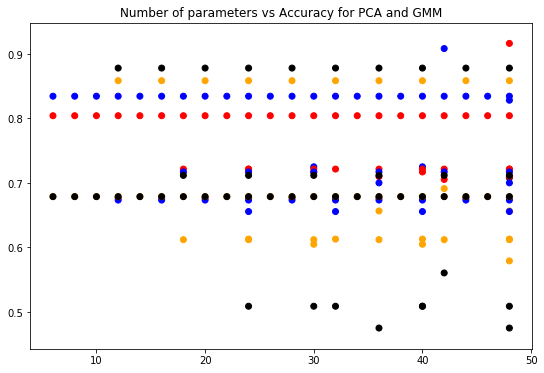

In [267]:
def P6():
    
    def calc_n_params(pca_n_components, gmm_n_components, num_classes = 2):
        # ( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters
        n_params = (pca_n_components + 2) * gmm_n_components * num_classes
        return n_params
    
    def do_pca(data, n_components):
        pca = PCA(n_components = 2, random_state = 0)
        pca.fit(data)
        data_pca = pca.transform(data)
        return data_pca
    
    def do_gmm(data, n_components, covariance_type):
        clf = GaussianMixture(n_components = n_components, covariance_type = covariance_type, random_state = 0)
        clf.fit(data)
        return clf
    
    def do_pred(train_data, train_labels, test_data, test_labels, pca_n_components, gmm_n_components, covariance_type):
        train_data_pca = do_pca(train_data, pca_n_components)
        test_data_pca = do_pca(test_data, pca_n_components)

        badshrooms = train_data_pca[train_labels == 1]
        goodshrooms = train_data_pca[train_labels == 0]

        gmm_badshrooms = do_gmm(badshrooms, gmm_n_components, covariance_type)
        gmm_goodshrooms = do_gmm(goodshrooms, gmm_n_components, covariance_type)

        probably_bad = gmm_badshrooms.score_samples(test_data_pca)
        probably_good = gmm_goodshrooms.score_samples(test_data_pca)
        test_preds = (probably_bad > probably_good) * 1

        # determines accuracy of test_preds
        from sklearn.metrics import accuracy_score
        score = accuracy_score(test_labels, test_preds)
        return score
    
    pca_n_components = np.arange(1, 50 + 1)
    gmm_n_components = np.arange(1, 50 + 1)
    cov_mat_type = ["spherical", "diag", "tied", "full"]
    
    
    res_pca_n = []
    res_gmm_n = []
    res_cov_t = []
    res_cov_t_idx = []
    res_score = []
    res_n_params = []
    for pca_n in pca_n_components:
        for gmm_n in gmm_n_components:
            for cov_t in cov_mat_type:
#                 print("=========================")
#                 print("pca_n, gmm_n, cov_t", pca_n, gmm_n, cov_t)
                res_pca_n.append(pca_n)
                res_gmm_n.append(gmm_n)
                res_cov_t.append(cov_t)
                res_cov_t_idx.append(cov_mat_type.index(cov_t))
                n_params = calc_n_params(pca_n, gmm_n)
                if n_params < 50:
                    score = do_pred(train_data, train_labels, test_data, test_labels, pca_n, gmm_n, cov_t)
                else:
                    # if too many params, just set to accuracy to 0
                    score = 0
                print("n_params, score", n_params, score)
                res_score.append(score)
                res_n_params.append(n_params)

    
    # converts to numpy arrays for easier indexing
    res_pca_n = np.asarray(res_pca_n)
    res_gmm_n = np.asarray(res_gmm_n)
    res_cov_t = np.asarray(res_cov_t)
    res_cov_t_idx = np.asarray(res_cov_t_idx)
    res_score = np.asarray(res_score)
    res_n_params = np.asarray(res_n_params)
    
    # finds best combination
    scores_lt_50_params = res_score[res_n_params < 50]
    max_score = max(scores_lt_50_params)
    idxs = np.where(res_score - max_score == 0)[0]
    print("best accuracy with params less than 50 parameters is", max_score)
    print("score", res_score[idxs])
    print("n_params", res_n_params[idxs])
    print("created by:")
    print("pca_n", res_pca_n[idxs])
    print("gmm_n", res_gmm_n[idxs])
    print("cov_t", res_cov_t[idxs])
    
    # creates our plot, for non-zero score combinations
    nz_idx = np.where(res_score != 0)[0]
    nz_n_params = res_n_params[nz_idx]
    nz_score = res_score[nz_idx]
    nz_cov_t_idx = res_cov_t_idx[nz_idx]
    
    colors = ["red","blue","orange","black"]
    from matplotlib.colors import ListedColormap
    cmap = ListedColormap(colors)
    plt.figure(figsize=(9,6))
    plt.scatter(x = nz_n_params, y = nz_score , c = nz_cov_t_idx, cmap = cmap)
    plt.title("Number of parameters vs Accuracy for PCA and GMM")
    plt.show()

                

P6()